# CTA Data Analysis

### ctapipe
This tutorial uses ctapipe, a framework for prototyping the low-level data processing algorithms for the Cherenkov Telescope Array. To get more information about the instalation and tutorials of ctapipe go to: https://cta-observatory.github.io/ctapipe/index.html

The public files here described are available at https://doi.org/10.5281/zenodo.7298569.

### Worflow: <br>
1. Open file and explore the dataset
>- See internal structure and metadata in HDF5 file.
>- Usage of ctapipe TableLoader
>- Subarray description
>- DL1: DL1a and DL1b. Plot images and see the parameters

## 1. Open file and explore the dataset.

### See internal structure and metadata in HDF5 file:

In [1]:
# Load necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u

# Packages to explore HDF5 file
import tables
from ctapipe.io import read_table

# Packages for subarray description
from ctapipe.instrument import SubarrayDescription
from ctapipe.visualization import CameraDisplay

# Packages for extracting the images parameters
from ctapipe.image import hillas_parameters
#from ctapipe.image import timing_parameters
#from ctapipe.image import number_of_islands
#from ctapipe.image import camera_to_shower_coordinates


In [2]:
hdf_file = "gamma-diffuse_with_images_00.dl2.h5"
h5file = tables.open_file(hdf_file, mode="r", title="DL file")

*See metadata related to the moment when the gamma file was created or modified:*

In [3]:
h5file.root._v_attrs

/._v_attrs (AttributeSet), 40 attributes:
   [CLASS := 'GROUP',
    CTA ACTIVITY ID := '5e2c2ca8-cbde-4632-87f9-40f1d2559e8f',
    CTA ACTIVITY NAME := 'ctapipe-merge',
    CTA ACTIVITY SOFTWARE NAME := 'ctapipe',
    CTA ACTIVITY SOFTWARE VERSION := '0.17.0',
    CTA ACTIVITY START TIME := '2022-11-09 16:52:07.713',
    CTA ACTIVITY TYPE := 'software',
    CTA CONTACT EMAIL := 'open-data@cta-observatory.org',
    CTA CONTACT NAME := 'CTA Public Data Team',
    CTA CONTACT ORGANIZATION := 'Cherenkov Telescope Observatory and Consortium',
    CTA CONTEXT COPYRIGHT := 'CTA Observatory gGmbH',
    CTA CONTEXT DESCRIPTION := 'CTA Public DL1 and DL2 data release\n\nFor a full description of this release, please go to\nhttps://doi.org/10.5281/zenodo.7298569.\n\nIf you use this dataset in your research, please cite\nthis data release using the bibliograpic data provided\nby Zenodo.\n',
    CTA CONTEXT DOI := '10.5281/zenodo.7298569',
    CTA CONTEXT LICENCE TYPE := 'CC BY 4.0',
    CTA CONTEX

*HDF5 files internal structure is composed of tables inside containers that we can browse at different leves:*

In [4]:
h5file

File(filename=gamma-diffuse_with_images_00.dl2.h5, title='', mode='r', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/configuration (Group) ''
/dl1 (Group) ''
/dl2 (Group) ''
/simulation (Group) ''
/simulation/event (Group) ''
/simulation/service (Group) ''
/simulation/service/shower_distribution (Table(50,)fletcher32, shuffle, blosc:zstd(5)) 'Storage of SimulatedShowerDistribution'
  description := {
  "obs_id": Int32Col(shape=(), dflt=0, pos=0),
  "hist_id": Int64Col(shape=(), dflt=0, pos=1),
  "n_entries": Int64Col(shape=(), dflt=0, pos=2),
  "bins_energy": Float64Col(shape=(121,), dflt=0.0, pos=3),
  "bins_core_dist": Float64Col(shape=(201,), dflt=0.0, pos=4),
  "histogram": Float32Col(shape=(120, 200), dflt=0.0, pos=5)}
  byteorder := 'little'
  chunkshape := (2,)
/simulation/event/subarray (Group) ''
/simulation/event/subarray/shower (Table(33922,)fletcher32, shuffle, blosc:zstd(5)) 'S

To visualize any of the tables, for instance /simulation/service/shower_distribution:

In [5]:
shower_distribution = read_table(hdf_file, '/simulation/service/shower_distribution')
shower_distribution[0:5]

obs_id,hist_id,n_entries,bins_energy,bins_core_dist,histogram
,,,TeV,m,
int32,int64,int64,float64[121],float64[201],"float32[120,200]"
5712,6,1000000,0.001 .. 1000.0,0.0 .. 3800.0,0.0 .. 0.0
5723,6,1000000,0.001 .. 1000.0,0.0 .. 3800.0,0.0 .. 0.0
5725,6,1000000,0.001 .. 1000.0,0.0 .. 3800.0,0.0 .. 0.0
5726,6,1000000,0.001 .. 1000.0,0.0 .. 3800.0,0.0 .. 0.0
5733,6,1000000,0.001 .. 1000.0,0.0 .. 3800.0,0.0 .. 0.0


### * Tip
To explore a HDF5 file through a GUI, you can use [vitables](https://vitables.org/) or [HDFView](https://www.hdfgroup.org/downloads/hdfview/). 

### ctapipe.io.TableLoader
ctpipe offers several ways to access the tables. Another convenient tool is to load the data using **ctapipe.io.TableLoader**

See the [TableLoader docs](https://cta-observatory.github.io/ctapipe/api/ctapipe.io.TableLoader.html#ctapipe.io.TableLoader)

In [6]:
from ctapipe.io import TableLoader

In [9]:
opts = dict(load_dl2=True, load_dl1_images=False, load_simulated=True)
with TableLoader("gamma-diffuse_with_images_00.dl2.h5", **opts) as loader:
    subarray = loader.subarray
    gamma_observations = loader.read_observation_information() 
    gamma_events = loader.read_subarray_events() 
    gamma_tel_events = loader.read_telescope_events() 
    gamma_hists = loader.read_shower_distribution() 
    gamma_sim_configs = loader.read_simulation_configuration() 

In [10]:
gamma_observations[0:5]

obs_id,sb_id,producer_id,state,subarray_pointing_lat,subarray_pointing_lon,subarray_pointing_frame,scheduled_duration,scheduled_start_time,actual_start_time,actual_duration
,,,,deg,deg,,min,,,min
uint64,uint64,str10,int64,float64,float64,int64,float64,Time,Time,float64
5712,5712,simulation,1,69.99999967119774,0.0,0,nan,59178.18206018519,59178.18206018519,nan
5723,5723,simulation,1,69.99999967119774,0.0,0,nan,59178.22278935185,59178.22278935185,nan
5725,5725,simulation,1,69.99999967119774,0.0,0,nan,59178.19215277778,59178.19215277778,nan
5726,5726,simulation,1,69.99999967119774,0.0,0,nan,59178.22280092593,59178.22280092593,nan
5733,5733,simulation,1,69.99999967119774,0.0,0,nan,59178.209085648145,59178.209085648145,nan


In [11]:
gamma_events[0:5]

obs_id,event_id,time,tels_with_trigger,event_type,true_energy,true_alt,true_az,true_core_x,true_core_y,true_h_first_int,true_x_max,true_shower_primary_id,HillasReconstructor_alt,HillasReconstructor_alt_uncert,HillasReconstructor_az,HillasReconstructor_az_uncert,HillasReconstructor_core_x,HillasReconstructor_core_y,HillasReconstructor_core_uncert_x,HillasReconstructor_core_uncert_y,HillasReconstructor_core_tilted_x,HillasReconstructor_core_tilted_y,HillasReconstructor_core_tilted_uncert_x,HillasReconstructor_core_tilted_uncert_y,HillasReconstructor_h_max,HillasReconstructor_h_max_uncert,HillasReconstructor_is_valid,HillasReconstructor_average_intensity,HillasReconstructor_goodness_of_fit,HillasReconstructor_telescopes
,,,,,TeV,deg,deg,m,m,m,g / cm2,,deg,deg,deg,deg,m,m,m,m,m,m,m,m,m,m,,,,
int32,int64,Time,bool[13],int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,bool[13]
5712,74802,59178.18607336361,False .. False,32,19.67578125,78.50238307456969,17.192687508925758,511.6286315917969,-295.4465026855469,19403.3046875,473.6475524902344,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,False .. False
5712,74804,59178.18704125552,False .. False,32,19.67578125,78.50238307456969,17.192687508925758,90.5317153930664,-33.260066986083984,19403.3046875,473.6475524902344,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,False .. False
5712,80503,59178.18767311757,False .. False,32,0.073501817882061,73.0544670982166,2.3129020494429517,129.20449829101562,-132.02418518066406,25764.58203125,248.18182373046875,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,False .. False
5712,117304,59178.189273955286,False .. False,32,0.3012327253818512,73.30871405988117,6.633242372842726,-15.393396377563477,422.7585144042969,25989.767578125,278.8888854980469,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,False .. False
5712,117308,59178.189400291216,False .. False,32,0.3012327253818512,73.30871405988117,6.633242372842726,-268.7888488769531,230.46316528320312,25989.767578125,278.8888854980469,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,False .. False


Take into account that TableLoader loads different hdf5 file tables into the same output table, in order to have all the relevant parameters for a study. For instance:
- **gamma_observations** is the table /configuration/observation/observation_block 
- **gamma_events** is a combination of the tables dl1/event/subarray/trigger, simulation/event/subarray/shower and dl1/event/subarray/geometry/HillasReconstructor
- **gamma_tel_events** is a combination of the tables dl1/event/telescope/parameters_tel_, dl2/event/telescope/impact/HillasReconstructor/tel_, simulation/event/telescope/impact/tel_, dl1/event/subarray/trigger, simulation/event/subarray/shower and dl1/event/subarray/geometry/HillasReconstructor
- **gamma_hists** is the table /simulation/service/shower_distribution
- **gamma_sim_configs** is the table /configuration/simulation/run

*For instance:*

In [12]:
gamma_hists[0:5], read_table(hdf_file, '/simulation/service/shower_distribution')[0:5]

(<Table length=5>
 obs_id hist_id n_entries   bins_energy   bins_core_dist    histogram    
                                TeV             m                        
 int32   int64    int64     float64[121]   float64[201]  float32[120,200]
 ------ ------- --------- --------------- -------------- ----------------
   5712       6   1000000 0.001 .. 1000.0  0.0 .. 3800.0       0.0 .. 0.0
   5723       6   1000000 0.001 .. 1000.0  0.0 .. 3800.0       0.0 .. 0.0
   5725       6   1000000 0.001 .. 1000.0  0.0 .. 3800.0       0.0 .. 0.0
   5726       6   1000000 0.001 .. 1000.0  0.0 .. 3800.0       0.0 .. 0.0
   5733       6   1000000 0.001 .. 1000.0  0.0 .. 3800.0       0.0 .. 0.0,
 <Table length=5>
 obs_id hist_id n_entries   bins_energy   bins_core_dist    histogram    
                                TeV             m                        
 int32   int64    int64     float64[121]   float64[201]  float32[120,200]
 ------ ------- --------- --------------- -------------- ----------------
 

In [13]:
def info(obs, events, tel_events):
    n_runs = len(obs)
    n_events = len(events)
    n_valid_stereo = np.count_nonzero(events['HillasReconstructor_is_valid'])
    n_tel_events = len(tel_events)
    n_valid_params = np.count_nonzero(tel_events['hillas_width'] > 0)
    
    print(f"Runs: {n_runs: 8d}")
    print(f"Events: {n_events: 8d}")
    print(f"With valid stereo: {n_valid_stereo: 8d}")
    print(f"Tel-Events: {n_tel_events: 8d}")
    print(f"With valid params: {n_valid_params: 8d}")

In [14]:
print("Gammas")
info(gamma_observations, gamma_events, gamma_tel_events)

Gammas
Runs:       50
Events:    33922
With valid stereo:    12169
Tel-Events:    92803
With valid params:    70132


- **Event:** a basic unit of data, detection associated with a cascade of particles. There are also calibration events, created via laser or pedestal, to estimate the noise.
- **Run:** set of events taken in similar conditions, i.e., pointing to the same astronomical source in a maximum time of 20 min (since the instrument response depends of zenital and azimutal angles).


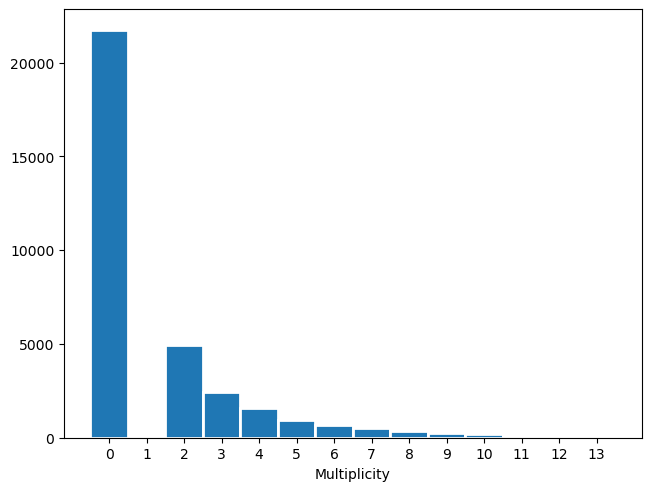

In [15]:
fig, ax = plt.subplots(layout="constrained")
multiplicity = np.count_nonzero(gamma_events['HillasReconstructor_telescopes'],axis=1)
bin_centers = np.arange(len(subarray) + 1)
bins = np.append(bin_centers - 0.5, bin_centers[-1] + 0.5)
ax.hist(
    multiplicity,
    bins=bins,
    linewidth=2,
    edgecolor='w',
)
ax.set_xlabel('Multiplicity')
ax.set_xticks(bin_centers)
None

### Subarray description
Here we will explore the telescope setup.

*Read instrument description, needed for camera display:*

In [16]:
subarray = SubarrayDescription.from_hdf(hdf_file)
subarray

SubarrayDescription(name='MonteCarloArray_1-11,19,35', n_tels=13)

In [17]:
subarray.info()

Subarray : MonteCarloArray_1-11,19,35
Num Tels : 13
Footprint: 0.28 km2

       Type       Count  Tel IDs  
----------------- ----- ----------
   LST_LST_LSTCam     4 1-4       
MST_MST_NectarCam     9 5-11,19,35


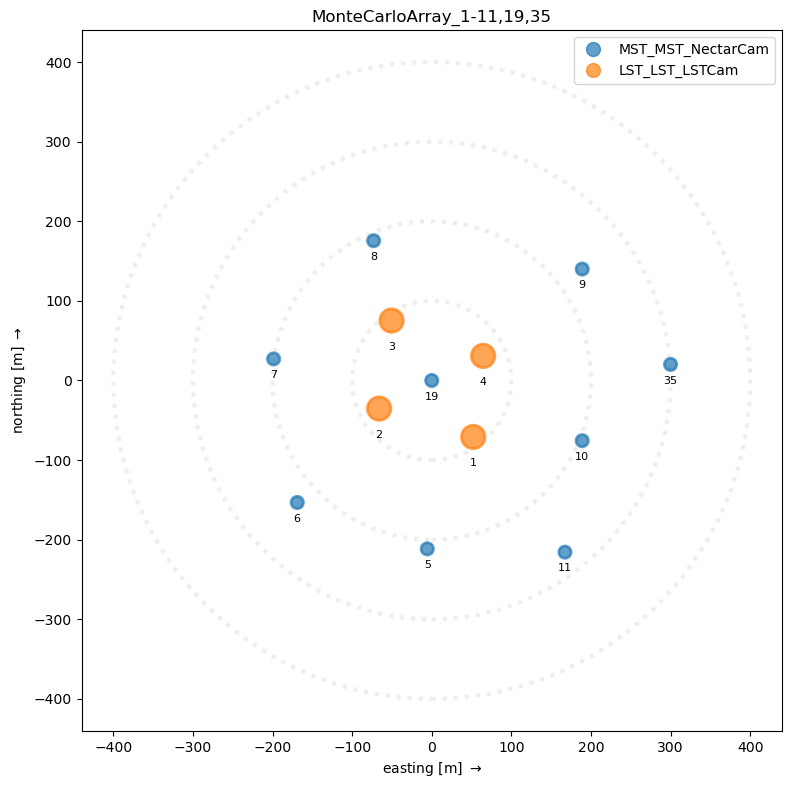

In [18]:
subarray.peek()

In [19]:
subarray.to_table()

tel_id,name,type,pos_x,pos_y,pos_z,camera_name,optics_name,camera_index,optics_index,tel_description
,,,m,m,m,,,,,
int16,str3,str3,float32,float32,float32,str9,str3,int64,int64,str17
1,LST,LST,-70.93,-52.07,43.0,LSTCam,LST,0,0,LST_LST_LSTCam
2,LST,LST,-35.27,66.14,32.0,LSTCam,LST,0,0,LST_LST_LSTCam
3,LST,LST,75.28,50.49,28.7,LSTCam,LST,0,0,LST_LST_LSTCam
4,LST,LST,30.91,-64.54,32.0,LSTCam,LST,0,0,LST_LST_LSTCam
5,MST,MST,-211.54,5.66,50.3,NectarCam,MST,1,1,MST_MST_NectarCam
6,MST,MST,-153.26,169.01,24.0,NectarCam,MST,1,1,MST_MST_NectarCam
7,MST,MST,27.07,198.71,12.2,NectarCam,MST,1,1,MST_MST_NectarCam
8,MST,MST,175.61,73.06,9.0,NectarCam,MST,1,1,MST_MST_NectarCam


In [20]:
subarray.tel

{1: TelescopeDescription(type='LST', optics_name='LST', camera_name='LSTCam'),
 2: TelescopeDescription(type='LST', optics_name='LST', camera_name='LSTCam'),
 3: TelescopeDescription(type='LST', optics_name='LST', camera_name='LSTCam'),
 4: TelescopeDescription(type='LST', optics_name='LST', camera_name='LSTCam'),
 5: TelescopeDescription(type='MST', optics_name='MST', camera_name='NectarCam'),
 6: TelescopeDescription(type='MST', optics_name='MST', camera_name='NectarCam'),
 7: TelescopeDescription(type='MST', optics_name='MST', camera_name='NectarCam'),
 8: TelescopeDescription(type='MST', optics_name='MST', camera_name='NectarCam'),
 9: TelescopeDescription(type='MST', optics_name='MST', camera_name='NectarCam'),
 10: TelescopeDescription(type='MST', optics_name='MST', camera_name='NectarCam'),
 11: TelescopeDescription(type='MST', optics_name='MST', camera_name='NectarCam'),
 35: TelescopeDescription(type='MST', optics_name='MST', camera_name='NectarCam'),
 19: TelescopeDescription

*Get a table of the optics description:*

In [21]:
subarray.to_table(kind="optics")

optics_name,size_type,reflector_shape,mirror_area,n_mirrors,n_mirror_tiles,equivalent_focal_length,effective_focal_length
,,,m2,,,m,m
str3,str3,str9,float64,int64,int64,float64,float64
LST,LST,PARABOLIC,386.7332458496094,1,198,28.0,29.30565071105957
MST,MST,HYBRID,106.2413558959961,1,86,16.0,16.445049285888672


*Choose one telescope to display properties, for instance LST, tel_id 1:*

In [22]:
tel = subarray.tel[1]
tel

TelescopeDescription(type='LST', optics_name='LST', camera_name='LSTCam')

In [23]:
tel.optics

OpticsDescription(name=LST, size_type=LST, reflector_shape=PARABOLIC, equivalent_focal_length=28.00 m, effective_focal_length=29.31 m, n_mirrors=1, mirror_area=386.73 m2)

In [24]:
tel.camera.geometry

CameraGeometry(name='LSTCam', pix_type=PixelShape.HEXAGON, npix=1855, cam_rot=0.000 deg, pix_rot=40.893 deg, frame=<CameraFrame Frame (focal_length=29.30565071105957 m, rotation=0.0 rad, telescope_pointing=None, obstime=None, location=None)>)

In [25]:
tel.camera.geometry.to_table()

pix_id,pix_x,pix_y,pix_area
,m,m,m2
int64,float64,float64,float64
0,0.0,0.0,0.002079326892271638
1,-0.037796701200384926,-0.032732429036768325,0.002079326892271638
2,-0.04724547496329345,0.01636666208397624,0.002079326892271638
3,-0.009448773762908523,0.049099091120744565,0.002079326892271638
4,0.037796701200384926,0.032732429036768325,0.002079326892271638
5,0.04724547496329345,-0.01636666208397624,0.002079326892271638
...,...,...,...
1849,1.1622417344092089,0.14728906047502396,0.002079326892271638


*Visualize the camera:*

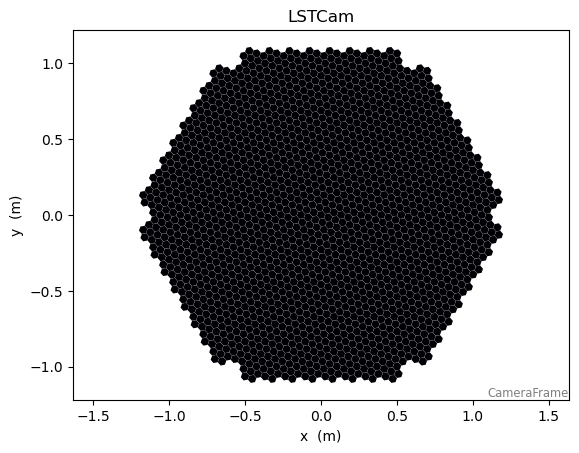

In [26]:
disp = CameraDisplay(tel.camera.geometry)

### DL1

DL1 is split in two sub-levels

* __DL1a__: calibrated images in units of photoelectrons (p.e.) and information about the time of arrival of the signal to each pixel.
* __DL1b__: parametrizations of the DL1a images, the so-called "Hillas parameters".

### DL1a: Images table:
*See images table for the LSTCam tel_id 001:*

In [27]:
dl1_images = read_table(hdf_file, '/dl1/event/telescope/images/tel_001')
dl1_images

obs_id,event_id,tel_id,image,peak_time,image_mask,is_valid
int32,int64,int16,float32[1855],float32[1855],bool[1855],bool
5712,117314,1,-0.8 .. 0.5,26.87 .. 4.33,False .. False,True
5712,165406,1,-0.7 .. -0.7,4.46 .. 33.18,False .. False,True
5712,165408,1,0.0 .. 1.4,3.41 .. 20.68,False .. False,True
5712,262603,1,-1.6 .. -1.6,11.3 .. 33.5,False .. False,True
5712,532712,1,-1.5 .. 0.4,21.06 .. 26.95,False .. False,True
5712,576705,1,-0.2 .. 1.3,8.73 .. 12.46,False .. False,True
...,...,...,...,...,...,...
5912,4692315,1,2.0 .. -0.5,34.96 .. 10.35,False .. False,True
5912,4703713,1,-1.1 .. 0.5,23.97 .. 34.35,False .. False,True


The images table stores, for each event and pixel:

- the charge in photo electrons ("image")
- the time of the light arrival in ns ("peak time")
- whether the pixel survived cleaning or not ("image_mask"). 

*There are 5987 different events, here we choose as an example the number 1:*

In [28]:
event = 2198
dl1_singleim = np.array(dl1_images['image'][event])
dl1_singlepeak = np.array(dl1_images['peak_time'][event])
obs_id = dl1_images['obs_id'][event]
event_id = dl1_images['event_id'][event]
print("obs_id:",obs_id,"event_id:",event_id)

obs_id: 5782 event_id: 1575616


*Show the image:*

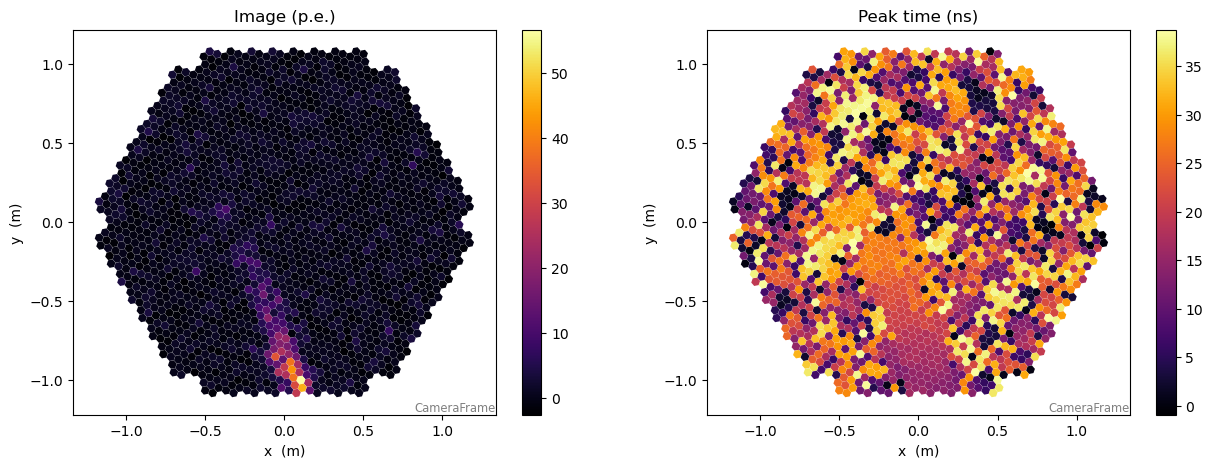

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
d1 = CameraDisplay(tel.camera.geometry, image=dl1_singleim, ax=ax1)
d2 = CameraDisplay(tel.camera.geometry, image=dl1_singlepeak, ax=ax2)

ax1.set_title("Image (p.e.)")
d1.add_colorbar(ax=ax1)

ax2.set_title("Peak time (ns)")
d2.add_colorbar(ax=ax2)


*Remove pixels that did not survived cleaning using "image_mask":*

In [30]:
dl1_mask = np.array(dl1_images['image_mask'])
dl1_singlemask = dl1_mask[event]

In [31]:
cleaned = dl1_singleim.copy()
cleaned[~dl1_singlemask] = 0 

In [32]:
cleaned_peak = dl1_singlepeak.copy()
cleaned_peak[~dl1_singlemask] = 0 

*Remove the image pixels that did not passed the clean cut:*

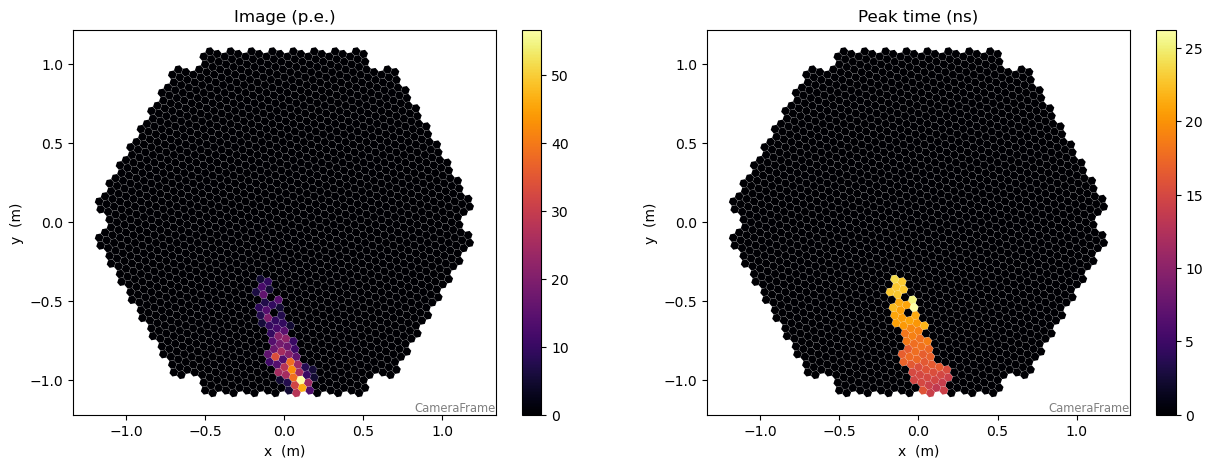

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
d1 = CameraDisplay(tel.camera.geometry, image=cleaned, ax=ax1)
d2 = CameraDisplay(tel.camera.geometry, image=cleaned_peak, ax=ax2)

ax1.set_title("Image (p.e.)")
d1.add_colorbar(ax=ax1)

ax2.set_title("Peak time (ns)")
d2.add_colorbar(ax=ax2)

*Now highlight the image pixels that passed the clean cut:*

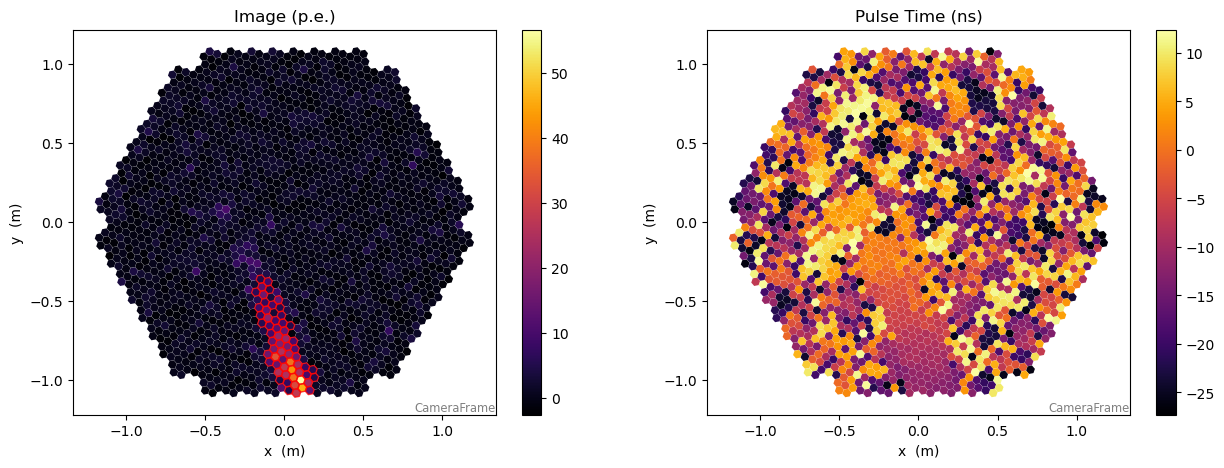

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

d1 = CameraDisplay(tel.camera.geometry, image=dl1_singleim, ax=ax1)
d2 = CameraDisplay(tel.camera.geometry, image=dl1_singlepeak - np.average(dl1_singlepeak, weights=dl1_singlepeak), ax=ax2)

ax1.set_title("Image (p.e.)")
d1.add_colorbar(ax=ax1)
d1.highlight_pixels(dl1_singlemask, color="red", linewidth=1)

ax2.set_title("Pulse Time (ns)")
d2.add_colorbar(ax=ax2)

### DL1b: Image parameters:
See parameters table for the LSTCam:

In [35]:
dl1_parameters = read_table(hdf_file, '/dl1/event/telescope/parameters/tel_001')
dl1_parameters

obs_id,event_id,tel_id,hillas_intensity,hillas_skewness,hillas_kurtosis,hillas_fov_lon,hillas_fov_lat,hillas_r,hillas_phi,hillas_length,hillas_length_uncertainty,hillas_width,hillas_width_uncertainty,hillas_psi,timing_intercept,timing_deviation,timing_slope,leakage_pixels_width_1,leakage_pixels_width_2,leakage_intensity_width_1,leakage_intensity_width_2,concentration_cog,concentration_core,concentration_pixel,morphology_n_pixels,morphology_n_islands,morphology_n_small_islands,morphology_n_medium_islands,morphology_n_large_islands,intensity_max,intensity_min,intensity_mean,intensity_std,intensity_skewness,intensity_kurtosis,peak_time_max,peak_time_min,peak_time_mean,peak_time_std,peak_time_skewness,peak_time_kurtosis,core_psi
,,,,,,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,1 / deg,,,,,,,,,,,,,,,,,,,,,,,,,deg
int32,int64,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,int64,int64,int64,int64,int64,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float64,float64,float64
5712,117314,1,97.33797788619995,-0.044612374773016675,2.110236995335603,0.27434493432532114,2.0546312150450414,2.0728662698851146,82.39455877538981,0.10832068657282148,0.005784263859318035,0.05153143259304214,0.003755781760284873,48.078876941712124,12.202242419336322,0.417981554326739,-5.928552554170282,0.001078167115902965,0.0026954177897574125,0.1961991,0.52385443,0.5212843116850531,0.3618889267210638,0.1927922954564788,9,1,0,1,0,18.766012,5.3761725,10.8153305,4.5855274,0.46455323696136475,-1.2686837911605835,13.332339,10.903664,12.215125,0.78820646,-0.2519283592700958,-1.0506300926208496,nan
5712,165406,1,54.234540939331055,-0.14862657310234745,2.4527596180683475,1.1795407757252065,-0.38510405870878467,1.2408148845143667,-18.081157880144797,0.07977714758402828,0.006528409738098628,0.05068507376600656,0.003847108302092837,3.691281634110221,10.516694086285039,2.0880623537929073,-10.780453051248458,0.0,0.0,0.0,0.0,0.557393919693173,0.39182990927330263,0.21281184675569859,7,1,0,1,0,11.541753,4.80531,7.747792,2.245624,0.31160661578178406,-1.1485446691513062,16.098234,9.362585,11.464106,2.0984054,1.298380970954895,0.6271548271179199,86.3087183746865
5712,165408,1,271.0926923751831,-0.48806682331893264,1.8704114920807355,1.5609513087887956,-1.4302658355904578,2.117127617520192,-42.49835368897166,0.28622154720773596,0.008109157436048287,0.07706486220330734,0.002710409490169019,33.160325208970285,20.045117455448864,1.7892725233406301,-23.33256195468915,0.007008086253369272,0.011859838274932614,0.5489834,0.9110434,0.15204163693184664,0.3387595675135381,0.07768343668009303,26,1,0,1,0,21.059412,5.353668,10.426642,4.146247,0.7186912894248962,-0.07389545440673828,32.075134,6.887032,20.092546,7.4222507,0.325804740190506,-1.1656514406204224,nan
5712,262603,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-1,-1,-1,-1,-1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
5712,532712,1,127.28208589553833,-0.04187349482586727,1.7376104690293483,0.39232219979011035,-1.4024360790050148,1.4562773307797905,-74.37138911186285,0.4073687201251767,0.015505564324940959,0.043383382261313164,0.0017509460649397525,11.004555672929996,15.625013582302387,0.641106095196204,-14.120862585078424,0.0,0.0,0.0,0.0,0.3247440102069352,0.22786139855207893,0.09795719348483133,14,3,0,3,0,12.468196,4.8572288,9.091578,2.6201475,-0.4123947024345398,-1.2017024755477905,23.910614,6.9482503,15.492255,5.7608666,-0.05919888988137245,-1.2978087663650513,78.99544433286464
5712,576705,1,142.16814756393433,-0.20026388184054422,1.9390439028221156,-1.0336016732540005,1.69993795394809,1.9895028188536674,121.30057081049102,0.1342017121428436,0.00545343143485976,0.07028170049633936,0.00333031132795659,-0.11998761616808057,15.24007843280059,0.831231873234076,-16.25144731416233,0.0026954177897574125,0.005390835579514825,0.4156

There are 3 types of parameters that describe the shower: 
- Hillas parameters.
- Leakage parameters.
- Concentration parameters.

### Hillas parameters:
The Hillas parameters are a set of geometric features that describe the orientation and size of an ellipse fitted to the area of a shower image, relying
on the fact that the gamma-ray images in the camera focal plane are, to a good approximation, elliptical in shape. These parameters are:
- image centroid or "center of gravity" (x, y)
- length and width of the ellipse
- size (total image amplitude)
- nominal distance d (angular distance between the centre of the camera and the image centre of gravity)
- azimuthal angle of the image main axis φ
- orientation angle α 

All parameters are calculated using the charge, time and coordinates of the pixels surviving the cleaning. The Hillas parameters can be used to estimate event properties, e.g. using random forests. 


![sketch_with_disp_angle.png](sketch_with_disp_angle.png)
Image adapted from https://github.com/cta-observatory/ctapipe/issues/1078#issuecomment-495663160


*It is possible to extract the Hillas parameters directly from DL1a images:*

In [36]:
hillas = hillas_parameters(tel.camera.geometry, cleaned)
print(hillas)
hillas

{'intensity': 991.7999978065491,
 'kurtosis': 2.7110964301942935,
 'length': <Quantity 0.19141818 m>,
 'length_uncertainty': <Quantity 0.00397538 m>,
 'phi': <Angle -1.55902483 rad>,
 'psi': <Angle -1.19780145 rad>,
 'r': <Quantity 0.83647577 m>,
 'skewness': -0.7518628762343095,
 'width': <Quantity 0.04790726 m>,
 'width_uncertainty': <Quantity 0.00096584 m>,
 'x': <Quantity 0.00984635 m>,
 'y': <Quantity -0.83641782 m>}


ctapipe.containers.CameraHillasParametersContainer:
                     intensity: total intensity (size) with default nan
                      skewness: measure of the asymmetry with default nan
                      kurtosis: measure of the tailedness with default nan
                             x: centroid x coordinate with default nan m [m]
                             y: centroid x coordinate with default nan m [m]
                             r: radial coordinate of centroid with default nan m
                                [m]
                           phi: polar coordinate of centroid with default nan
                                deg [deg]
                        length: standard deviation along the major-axis with
                                default nan m [m]
            length_uncertainty: uncertainty of length with default nan m [m]
                         width: standard spread along the minor-axis with
                                default nan m [m]
        

*Plot Hillas parameters over the cleaned image:*

(-1.3364178201763721, -0.336417820176372)

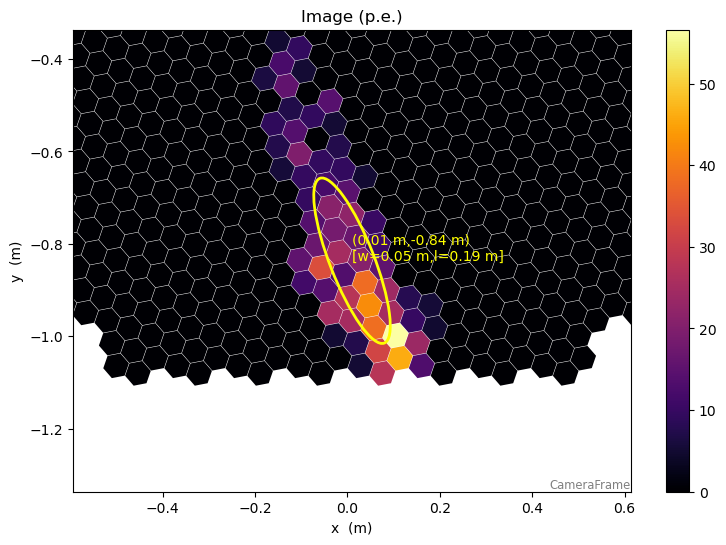

In [37]:
fig, (ax1) = plt.subplots(1, 1, figsize=(9, 6))

disp = CameraDisplay(tel.camera.geometry, image=cleaned, title = "Image (p.e.)")
disp.add_colorbar()
disp.overlay_moments(hillas, color="yellow", lw = 2)

plt.xlim(hillas.x.to_value(u.m) - 0.5, hillas.x.to_value(u.m) + 0.5)
plt.ylim(hillas.y.to_value(u.m) - 0.5, hillas.y.to_value(u.m) + 0.5)

*Hillas parameters from the given table:*

In [38]:
dl1_parameters[0:5]

obs_id,event_id,tel_id,hillas_intensity,hillas_skewness,hillas_kurtosis,hillas_fov_lon,hillas_fov_lat,hillas_r,hillas_phi,hillas_length,hillas_length_uncertainty,hillas_width,hillas_width_uncertainty,hillas_psi,timing_intercept,timing_deviation,timing_slope,leakage_pixels_width_1,leakage_pixels_width_2,leakage_intensity_width_1,leakage_intensity_width_2,concentration_cog,concentration_core,concentration_pixel,morphology_n_pixels,morphology_n_islands,morphology_n_small_islands,morphology_n_medium_islands,morphology_n_large_islands,intensity_max,intensity_min,intensity_mean,intensity_std,intensity_skewness,intensity_kurtosis,peak_time_max,peak_time_min,peak_time_mean,peak_time_std,peak_time_skewness,peak_time_kurtosis,core_psi
,,,,,,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,1 / deg,,,,,,,,,,,,,,,,,,,,,,,,,deg
int32,int64,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,int64,int64,int64,int64,int64,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float64,float64,float64
5712,117314,1,97.33797788619995,-0.044612374773016675,2.110236995335603,0.27434493432532114,2.0546312150450414,2.0728662698851146,82.39455877538981,0.10832068657282148,0.005784263859318035,0.05153143259304214,0.003755781760284873,48.078876941712124,12.202242419336322,0.417981554326739,-5.928552554170282,0.001078167115902965,0.0026954177897574125,0.1961991,0.52385443,0.5212843116850531,0.3618889267210638,0.1927922954564788,9,1,0,1,0,18.766012,5.3761725,10.8153305,4.5855274,0.46455323696136475,-1.2686837911605835,13.332339,10.903664,12.215125,0.78820646,-0.2519283592700958,-1.0506300926208496,nan
5712,165406,1,54.234540939331055,-0.14862657310234745,2.4527596180683475,1.1795407757252065,-0.38510405870878467,1.2408148845143667,-18.081157880144797,0.07977714758402828,0.006528409738098628,0.05068507376600656,0.003847108302092837,3.691281634110221,10.516694086285039,2.0880623537929073,-10.780453051248458,0.0,0.0,0.0,0.0,0.557393919693173,0.39182990927330263,0.21281184675569859,7,1,0,1,0,11.541753,4.80531,7.747792,2.245624,0.31160661578178406,-1.1485446691513062,16.098234,9.362585,11.464106,2.0984054,1.298380970954895,0.6271548271179199,86.3087183746865
5712,165408,1,271.0926923751831,-0.48806682331893264,1.8704114920807355,1.5609513087887956,-1.4302658355904578,2.117127617520192,-42.49835368897166,0.28622154720773596,0.008109157436048287,0.07706486220330734,0.002710409490169019,33.160325208970285,20.045117455448864,1.7892725233406301,-23.33256195468915,0.007008086253369272,0.011859838274932614,0.5489834,0.9110434,0.15204163693184664,0.3387595675135381,0.07768343668009303,26,1,0,1,0,21.059412,5.353668,10.426642,4.146247,0.7186912894248962,-0.07389545440673828,32.075134,6.887032,20.092546,7.4222507,0.325804740190506,-1.1656514406204224,nan
5712,262603,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-1,-1,-1,-1,-1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
5712,532712,1,127.28208589553833,-0.04187349482586727,1.7376104690293483,0.39232219979011035,-1.4024360790050148,1.4562773307797905,-74.37138911186285,0.4073687201251767,0.015505564324940959,0.043383382261313164,0.0017509460649397525,11.004555672929996,15.625013582302387,0.641106095196204,-14.120862585078424,0.0,0.0,0.0,0.0,0.3247440102069352,0.22786139855207893,0.09795719348483133,14,3,0,3,0,12.468196,4.8572288,9.091578,2.6201475,-0.4123947024345398,-1.2017024755477905,23.910614,6.9482503,15.492255,5.7608666,-0.05919888988137245,-1.2978087663650513,78.99544433286464


*Choose the parameters that correspond to the obs_id and event_id of the selected image:*

In [39]:
hillas_singleim = dl1_parameters[(dl1_parameters['obs_id'] == obs_id) & (dl1_parameters['event_id'] == event_id)
                                & (dl1_parameters['tel_id'] == 1)]

In [40]:
hillas_singleim

obs_id,event_id,tel_id,hillas_intensity,hillas_skewness,hillas_kurtosis,hillas_fov_lon,hillas_fov_lat,hillas_r,hillas_phi,hillas_length,hillas_length_uncertainty,hillas_width,hillas_width_uncertainty,hillas_psi,timing_intercept,timing_deviation,timing_slope,leakage_pixels_width_1,leakage_pixels_width_2,leakage_intensity_width_1,leakage_intensity_width_2,concentration_cog,concentration_core,concentration_pixel,morphology_n_pixels,morphology_n_islands,morphology_n_small_islands,morphology_n_medium_islands,morphology_n_large_islands,intensity_max,intensity_min,intensity_mean,intensity_std,intensity_skewness,intensity_kurtosis,peak_time_max,peak_time_min,peak_time_mean,peak_time_std,peak_time_skewness,peak_time_kurtosis,core_psi
,,,,,,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,1 / deg,,,,,,,,,,,,,,,,,,,,,,,,,deg
int32,int64,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,int64,int64,int64,int64,int64,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float64,float64,float64
5782,1575616,1,992.0502128601074,0.7514978269493869,2.7102775410291855,-1.6351734849152877,0.01920847615272507,1.635286302555646,179.32697416803774,0.37426437459233736,0.007769891654351046,0.09364881271699206,0.0018878381549131363,-21.371537229011867,17.186073515947893,1.0234382488334623,6.720953004356481,0.00215633423180593,0.004851752021563342,0.09278616,0.21838616,0.05963286681549821,0.29829133553332043,0.05709536019361316,60,1,0,0,1,56.641464,4.758179,16.53417,11.264714,1.4065786600112915,1.805354118347168,26.242805,13.514758,18.253405,3.1272986,0.5256193280220032,-0.6449742317199707,-68.62846278780464


### ctapipe.io.TableLoader
Now we will load all four LST telescopes and plot their images using **ctapipe.io.TableLoader**

In [43]:
with TableLoader("gamma-diffuse_with_images_00.dl2.h5",
    load_dl1_images=True,
    load_true_images=True,
    load_simulated=True,
) as loader: 
    lst_images = loader.read_telescope_events("LST_LST_LSTCam", start=0,stop=10000)

In [44]:
lst_images[0:5]

obs_id,event_id,tel_id,time_mono,n_trigger_pixels,hillas_intensity,hillas_skewness,hillas_kurtosis,hillas_fov_lon,hillas_fov_lat,hillas_r,hillas_phi,hillas_length,hillas_length_uncertainty,hillas_width,hillas_width_uncertainty,hillas_psi,timing_intercept,timing_deviation,timing_slope,leakage_pixels_width_1,leakage_pixels_width_2,leakage_intensity_width_1,leakage_intensity_width_2,concentration_cog,concentration_core,concentration_pixel,morphology_n_pixels,morphology_n_islands,morphology_n_small_islands,morphology_n_medium_islands,morphology_n_large_islands,intensity_max,intensity_min,intensity_mean,intensity_std,intensity_skewness,intensity_kurtosis,peak_time_max,peak_time_min,peak_time_mean,peak_time_std,peak_time_skewness,peak_time_kurtosis,core_psi,image,peak_time,image_mask,is_valid,true_image_sum,true_image,true_impact_distance,true_impact_distance_uncert,time,tels_with_trigger,event_type,true_energy,true_alt,true_az,true_core_x,true_core_y,true_h_first_int,true_x_max,true_shower_primary_id
,,,,,,,,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,1 / deg,,,,,,,,,,,,,,,,,,,,,,,,,deg,,,,,,,m,m,,,,TeV,deg,deg,m,m,m,g / cm2,
int32,int64,int16,Time,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,int64,int64,int64,int64,int64,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float64,float64,float64,float32[1855],float32[1855],bool[1855],bool,int32,int32[1855],float64,float64,Time,bool[13],int64,float64,float64,float64,float64,float64,float64,float64,int64
5712,117314,1,59178.18961183301,-1,97.33797788619995,-0.044612374773016675,2.110236995335603,0.27434493432532114,2.0546312150450414,2.0728662698851146,82.39455877538981,0.10832068657282148,0.005784263859318035,0.05153143259304214,0.003755781760284873,48.078876941712124,12.202242419336322,0.417981554326739,-5.928552554170282,0.001078167115902965,0.0026954177897574125,0.1961991,0.52385443,0.5212843116850531,0.3618889267210638,0.1927922954564788,9,1,0,1,0,18.766012,5.3761725,10.8153305,4.5855274,0.46455323696136475,-1.2686837911605835,13.332339,10.903664,12.215125,0.78820646,-0.2519283592700958,-1.0506300926208496,nan,-0.8 .. 0.5,26.87 .. 4.33,False .. False,True,287,0 .. 0,314.5490499429079,0.0,59178.18961183301,True .. True,32,0.3012327253818512,73.30871405988117,6.633242372842726,126.31205749511719,189.2550048828125,25989.767578125,278.8888854980469,0
5712,117314,2,59178.18961183301,-1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-1,-1,-1,-1,-1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.9 .. -1.3,25.61 .. 1.01,False .. False,True,254,0 .. 0,205.33138125505482,0.0,59178.18961183301,True .. True,32,0.3012327253818512,73.30871405988117,6.633242372842726,126.31205749511719,189.2550048828125,25989.767578125,278.8888854980469,0
5712,165406,1,59178.19797468599,-1,54.234540939331055,-0.14862657310234745,2.4527596180683475,1.1795407757252065,-0.38510405870878467,1.2408148845143667,-18.081157880144797,0.07977714758402828,0.006528409738098628,0.05068507376600656,0.003847108302092837,3.691281634110221,10.516694086285039,2.0880623537929073,-10.780453051248458,0.0,0.0,0.0,0.0,0.557393919693173,0.39182990927330263,0.21281184675569859,7,1,0,1,0,11.541753,4.80531,7.747792,2.245624,0.31160661578178406,-1.1485446691513062,16.098234,9.362585,11.464106,2.0984054,1.298380970954895,0.6271548271179199,86.3087183746865,-0.7 .. -0.7,4.46 .. 33.18,False .. False,True,1493,0 .. 0,1229.3247393185218,0.0,59178.19797468599,True .. False,32,58.88951110839844,70.6967336080524,27.806446309288734,410.4243469238281,1080.7325439453125,28967.982421875,375.32244873046875,0
5712,165406,2,59178.19797468599,-1,110.27186870574951,-0.014258722386058756,1.2962378830974608,0.9357274949947504,-0.6007637364500358,1.1119815699563365,-32.70161996447605,0.19685572010019714,0.005101594945696215,0.05829712649620277,0.00265194

In [45]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


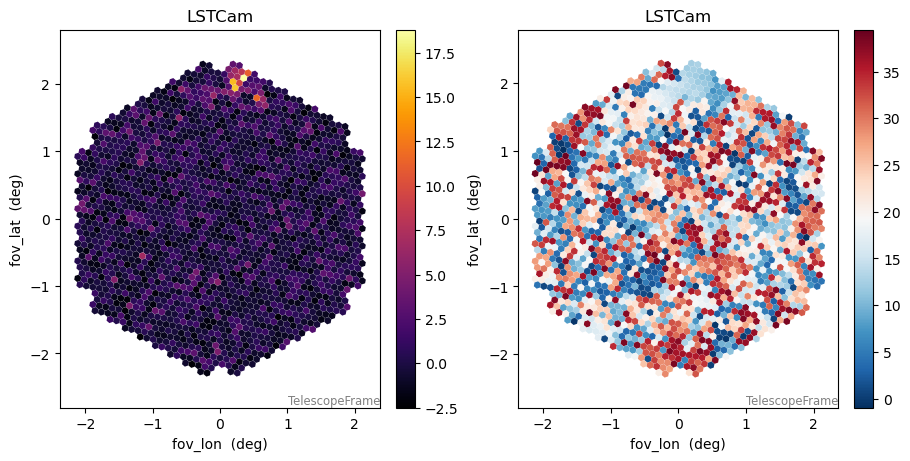

interactive(children=(IntSlider(value=1900, description='index', max=7472), Output()), _dom_classes=('widget-i…

<function __main__.update(index)>

In [46]:
from ipywidgets import interact, IntSlider
from ctapipe.coordinates import TelescopeFrame
camera = subarray.tel[1].camera.geometry.transform_to(TelescopeFrame())
fig, (ax_image, ax_time) = plt.subplots(1, 2, layout="constrained", figsize=(9,4.5))
d_image = CameraDisplay(
    camera,
    image=lst_images['image'][0],
    ax=ax_image
)
d_image.add_colorbar()
d_time = CameraDisplay(
    camera,
    image=lst_images['peak_time'][0],
    ax=ax_time,
    cmap=plt.get_cmap('RdBu_r').with_extremes(bad='gray')
)
d_time.add_colorbar()

def update(index):
    row = lst_images[index]
    d_image.image = row['image']
    d_time.image = np.where(row['image_mask'], row['peak_time'], np.nan)
    ax_image.set_title(f'obs_id {row["obs_id"]}, event_id {row["event_id"]},tel_id {row["tel_id"]}')
    ax_time.set_title(f'true_energy {row["true_energy"]:.3f} TeV')
    
interact(update, index=IntSlider(min=0, max=len(lst_images) - 1, value=1900))